# Pix2Pix 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image
import numpy as np

* 이미지 변환인데 쌍으로 데이터가 존재해야한다.

ex) [흑백사진, 컬러사진], [스케치 이미지, 색칠된 이미지], [흑백 이미지, 컬러 이미지] 등

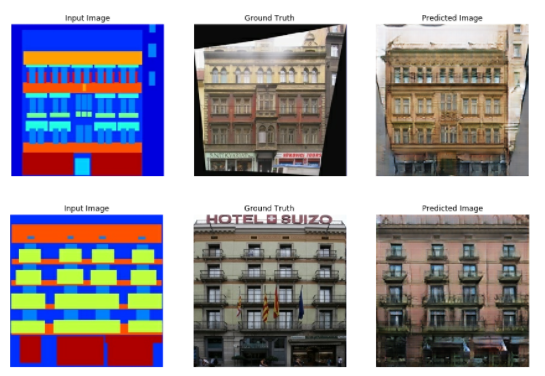

In [3]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/pix2pix.png')

* Image dataset = (이미지, 내가 변환하고 싶은 스타일의 이미지)

* Loss : 일반적인 GAN Loss

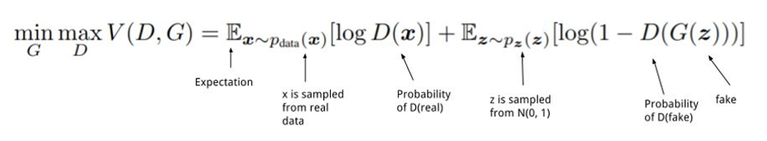

In [4]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/loss.png')

* 조건부 추가 : 이러한 map이면 이렇게 생성해주세요.<br>
Generator에 random noiss Z와 image map X(조건부 이미지)를 함께 입력.<br>
Descriminator에도 image map x(조건부 이미지)와 y(real image)를 함께 입력.

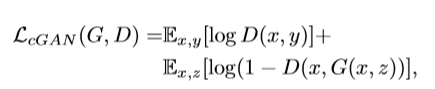

In [5]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/cganloss.png')

* 위의 Loss에 만든 이미지와 실제 이미지의 픽셀 간의 차이 loss : L1 Loss 추가

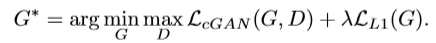

In [6]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/pixloss.png')

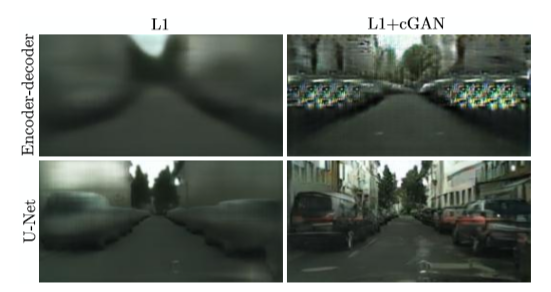

In [7]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/l1.png')

→ GAN Loss에 생성한 이미지와 원본 이미지의 L1 Loss를 추가하니 이미지 변환이 더 잘 되었다.

# CycleGAN
* Pix2Pix의 한계 : 이미지 생성을 위해서 데이터 쌍이 필요로 함. 하지만, 현실에서는 그러한 데이터 쌍을 구하는 것이 많은 비용이 듦.

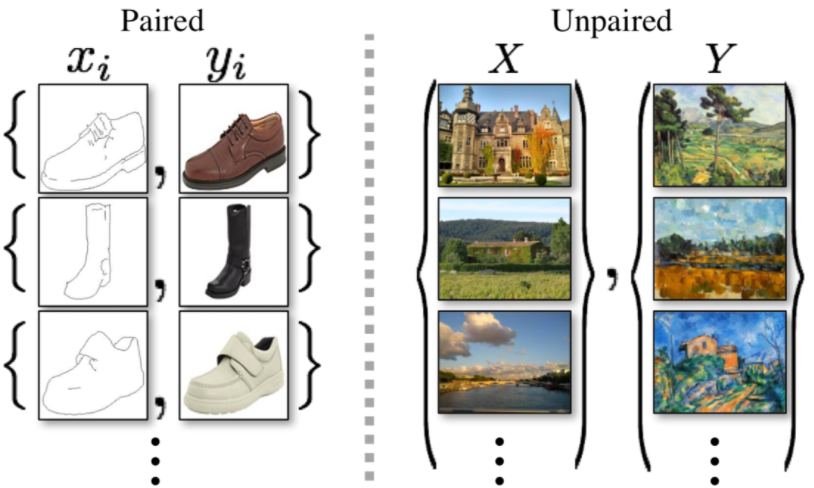

In [8]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/vs.png')

→ Pix2Pix는 왼쪽과 같이 스케치 이미지를 색칠된 이미지로 변환하려고 할때 (스케치 이미지, 색칠된 이미지)의 쌍이 있어야 모델이 학습이 가능했다.<br> 하지만 현실에서 이러한 데이터 쌍을 구축하기가 쉽지 않다.

* 변환하고자하는 이미지의 쌍없이 이미지 생성을 가능하게 하는 모델

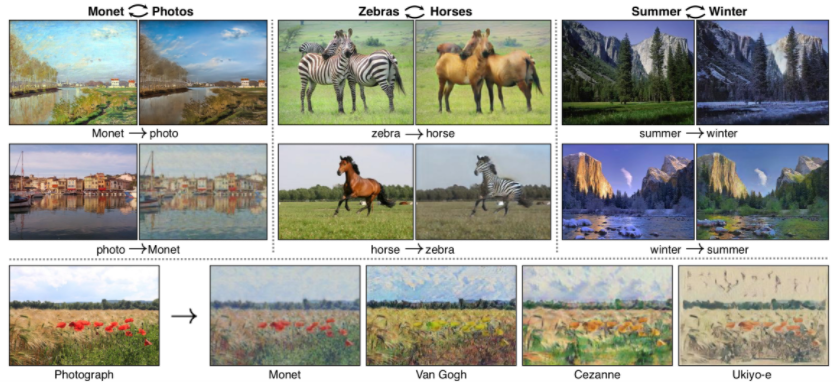

In [9]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/monet.png')

* 학습에 필요한 패키지 설치

In [10]:
!pip install git+https://github.com/tensorflow/examples.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-zhagc6ra
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-zhagc6ra
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0bde1b3aad9c436c9bc6d10ef6fd0d9dce0b89eb_-py3-none-any.whl size=299700 sha256=d9802cb4fa6d6d69d12005a6f347e33e7d5048ae5685b28c520934943c90f036
  Stored in directory: /tmp/pip-ephem-wheel-cache-kwv3xg8w/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/i

In [11]:
import tensorflow as tf

In [12]:
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
# 위에서 설명한 데로 기본적으로 pix2pix 모델을 베이스로 한다. 
# pix2pix의 모델은 한번에 불러오는 코드

import os
import time
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

AUTOTUNE = tf.data.AUTOTUNE
# 런타임이 실행되면 동적으로 값을 조정

## Dataset

* 여러장의 모네 그림과 이미지를 불러온다. 동일한 쌍이 아니다.

In [13]:
dataset, metadata = tfds.load('cycle_gan/monet2photo',
                              with_info=True, as_supervised=True)
# cyclegan에서 사용할 데이터를 불러와서 trainA와 trainB로 분리
train_Monet, train_Photo = dataset['trainA'], dataset['trainB']
test_Monet, test_Photo = dataset['testA'], dataset['testB']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/4 [00:00<?, ? splits/s]

Generating trainA examples...:   0%|          | 0/1072 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incomplete4NOKHN/cycle_gan-trainA.tfrecord*...:   …

Generating trainB examples...:   0%|          | 0/6287 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incomplete4NOKHN/cycle_gan-trainB.tfrecord*...:   …

Generating testA examples...:   0%|          | 0/121 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incomplete4NOKHN/cycle_gan-testA.tfrecord*...:   0…

Generating testB examples...:   0%|          | 0/751 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incomplete4NOKHN/cycle_gan-testB.tfrecord*...:   0…

Dataset cycle_gan downloaded and prepared to ~/tensorflow_datasets/cycle_gan/monet2photo/2.0.0. Subsequent calls will reuse this data.


In [14]:
BUFFER_SIZE = 1000 
# 한번에 셔플할 사이즈
BATCH_SIZE = 1
# Batch_size 설정
IMG_WIDTH = 256
IMG_HEIGHT = 256

* 이미지 처리

In [15]:
def random_crop(image):
    cropped_image = tf.image.random_crop(
      image, size=[IMG_HEIGHT, IMG_WIDTH, 3])
    # 286x286 -> 256x256으로 random crop

    return cropped_image
# 이미지의 특정 부분을 랜덤하게 잘라주는 함수 : crop

In [16]:
# normalizing the images to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

In [17]:
def random_jitter(image):
    image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR) 
    # 이미지 사이즈를 조정하고,
    image = random_crop(image)
    # 이미지를 랜덤하게 잘라주고 (256x256)
    image = tf.image.random_flip_left_right(image)
    # 이미지를 랜덤하게 flip
    return image
# 최종적으로 같은 이미지도 모양이 다르게 증강시킨다.

In [18]:
def preprocess_image_train(image, label):
    image = random_jitter(image)
    # 위에서 만든 이미지 증강 함수
    image = normalize(image)
    # 이미지 정규화[-1, 1]
    return image

In [19]:
def preprocess_image_test(image, label):
    image = normalize(image)
    # 그냥 정규화만 진행하는 함수
    return image
# 이미지증강&정규화를 사용하여 학습하고 테스트는 정규화만시켜서 진행

### Data Load

In [20]:
train_Monet = train_Monet.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)
    # cache는 hd에서 계속 끌어올리지 않고 ram에 캐싱하여 사용. 한번만 읽고 전처리수행
    # 이미지에 함수 적용
    # num_parallel_calls=병렬처리 레벨을 지정하는데, 
    # AUTOTUNE은 CPU를 기반으로 동적으로 적절한 스레드한다.

train_Photo = train_Photo.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)
    
test_Monet = test_Monet.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)
    # .cache() : shuffle을 하기전에 메모리 사용량을 줄이기 위해서
    # 캐싱이후 shuffle 적용
test_Photo = test_Photo.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

* 샘플 이미지를 한장 뽑아서 시각화해본다.

* 이렇게 전혀 다른 그림, 사진으로 학습을 한다.
<br> → 정상/비정상 데이터셋이 있으면 정상 데이터를 비정상 데이터로 만들 수 있다.

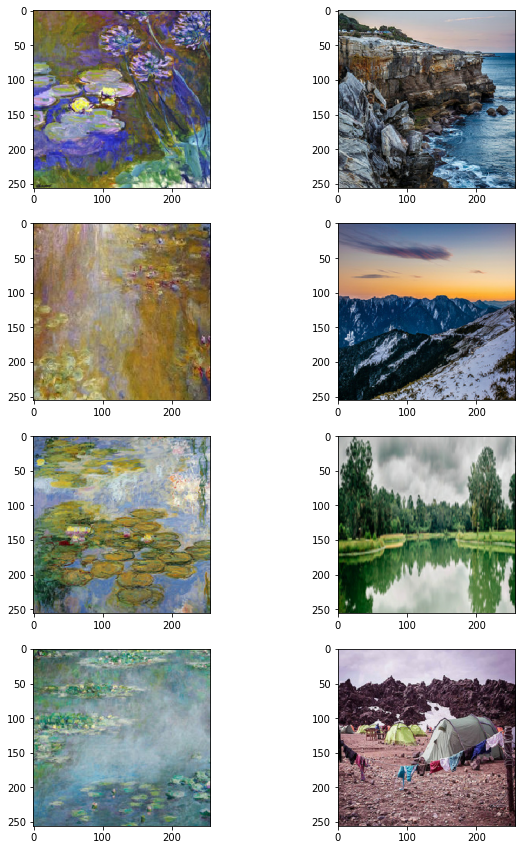

In [21]:
_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, samples in enumerate(zip(train_Monet.take(4), train_Photo.take(4))):
    # 모네그림 사진 각각 4장을 가져와서 시각화
    Monet = (((samples[0][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    Photo = (((samples[1][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    ax[i, 0].imshow(Monet)
    ax[i, 1].imshow(Photo)
plt.show()

## Model

* pix2pix를 CycleGAN에 활용
<br> 결국 앞에서 배웠던 좋은 Network를 응용하여 사용

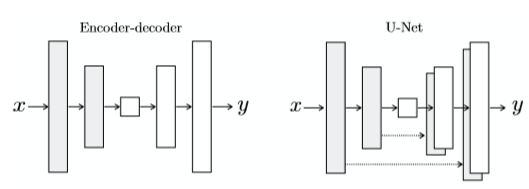

In [22]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/unet.png')

* 이미지 하나에 대해서 Norm 적용

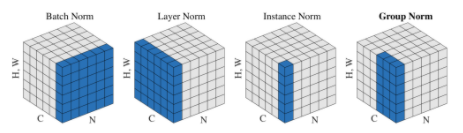

In [23]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/insnorm.png')

In [24]:
OUTPUT_CHANNELS = 3

gen_G = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
# unet을 사용한 generator g # Monet -> Photo
gen_F = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
# unet을 사용한 generator f # Photo -> Monet

disc_X = pix2pix.discriminator(norm_type='instancenorm', target=False)
disc_Y = pix2pix.discriminator(norm_type='instancenorm', target=False)

## Loss functions

* 모네그림을 사진으로 바꾸는데 모네그림에서의 형상을 그대로 유지해야한다. 그런데 generator로 한번만 생성하면 형상을 유지하지 않고 그냥 아무 사진으로만 바꿀 수 있다. 따라서 한번 generator를 통과한 모네그림으로 만든 가짜 사진을 다시 모네그림으로 되돌리는 과정을(cycle-consistency loss) 넣어서 아무 사진으로나 변경하는 것이 아니라 모네그림을 유지한채 변경하도록 한다.

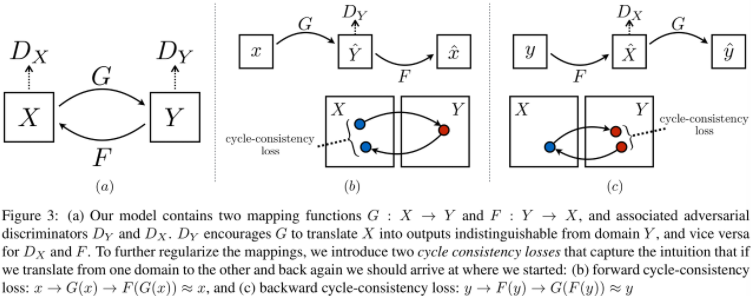

In [25]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/cycleloss.png')

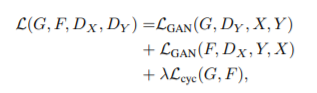

In [26]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/cyloss.png')

→ 모네그림을 사진으로 바꾸어 주는 Gan model loss와 사진을 모네그림으로 바꾸어주는 Gan model loss 그리고 cycle consistency loss가 있다.

* Loss 정의

In [27]:
adv_loss_fn = tf.keras.losses.MeanSquaredError()
# lsgan loss사용 (cross entropy를 사용하기도 함. but gradient vanishing)

In [28]:
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5

In [29]:
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss

* Cycle Loss : 사진을 모네처럼 보이는 사진으로 변경했다가 다시 그것을 사진으로 변경한 것이 원래의 사진과 동일한지에 대한 Loss

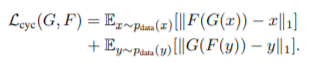

In [30]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/consis.png')

In [31]:
class CycleGan(tf.keras.Model): 
    # Model 상속
    ################### 사용할 객체, 모델, optimizer 정의 #####################

    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):

        super(CycleGan, self).__init__() # 기반 클래스 호출(그래야 tf.keras.Model사용가능)
        self.gen_G = generator_G        # super(파생클래스, self).기반 클래스 메소드
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity
        # 모델을 구성하는 객체 정의


    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super(CycleGan, self).compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = tf.keras.losses.MeanAbsoluteError()
        # optimizer와 loss 정의
        self.identity_loss_fn = tf.keras.losses.MeanAbsoluteError() 
        # x를 넣으면 x가 나오도록 generator를 학습시키는 용도 : 기본 loss와 별개로 Generator의 성능을 높이기 위해 추가
        
        



    ######################### 학습 구간 #############################
    def train_step(self, batch_data):
      ### 진짜 데이터 x(사진), 진짜 데이터 y(모데그림) ###
        real_x, real_y = batch_data

        ### 학습하면서 GD 계산 ###
        with tf.GradientTape(persistent=True) as tape:
            
            #### 각각 가짜 이미지를 만들어주는 생성자 G 두개 ###

            # Monet to fake Photo : 진짜 데이터(사진)을 갖고 가짜 모네 그림을 만들어주는 gen_G
            fake_y = self.gen_G(real_x, training=True)
            # fake_y : 가짜 모네

            # Photo to fake Monet -> y2x : 진짜 데이터(모네 그림)을 갖고 가짜 사진을 만들어주는 gen_F
            fake_x = self.gen_F(real_y, training=True)
            # fake_x : 가짜 사진

        ### 이미지가 다시 원본으로 돌아올 수 있도록 다시 되돌아오는 구조를 만들어줌 ###

            # Cycle (Monet to fake Photho to fake Monet): x -> y -> x : 가짜 모네그림을 입력받아서 그걸 다시 사진으로 만들어주는 과정
            cycled_x = self.gen_F(fake_y, training=True)
            # cycled_x : 사진으로 만든 가짜 모네로 다시 가짜 사진 만듦

            # Cycle (Photo to fake Monet to fake Photo) y -> x -> y : 가짜 사진을 입력받아서 그걸 다시 모네 그림으로 만들어주는 과정
            cycled_y = self.gen_G(fake_x, training=True)
            # cycled_y : 모네로 만든 가짜 사진으로 다시 가짜 모네 만듦


            # Identity mapping : 진짜 이미지도 넣어서 진짜 이미지를 생성할 수 있게 구조를 만들어줌.
            same_x = self.gen_F(real_x, training=True)
            # 진짜 데이터(사진)을 입력받아서 사진을 잘 생성하도록 만들어주는 과정
            same_y = self.gen_G(real_y, training=True)
            # 진짜 데이터(모네 그림)을 입력받아서 모네 그림을 잘 생성하도록 만들어주는 과정


            #### Discriminator output : 잘 구분해야함.

            # 진짜 데이터(사진)을 받는 disc
            disc_real_x = self.disc_X(real_x, training=True)
            # 가짜 데이터(모네 그림을 입력받아서 생성한 사진)을 받는 disc
            disc_fake_x = self.disc_X(fake_x, training=True)
            # 가짜 사진을 받는 disc

            disc_real_y = self.disc_Y(real_y, training=True)
            # 진짜 데이터(모네 그림)을 받는 disc
            disc_fake_y = self.disc_Y(fake_y, training=True)
            # 가짜 데이터(사진을 입력받아서 생성한 모네 그림)



            ###### Generator adverserial loss : 앞서서 구성된 loss와 동일하게 설계 #####

            ##### gen_loss는 가짜 데이터를 주면서 진짜라고 학습되게 해야한다.
            '''def generator_loss_fn(fake):
                  fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
                  return fake_loss'''

            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            # 가짜를 1이라고 하도록
            gen_F_loss = self.generator_loss_fn(disc_fake_x)
            # 가짜를 1이라고 하도록


            ##### Generator cycle loss : MSE Loss
            
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            # 진짜 데이터(모네 그림)와 모네 그림으로 만든 가짜 사진을 입력받아서 그걸 다시 모네 그림으로 만들어준 것과의 Loss
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle
            # 진짜 데이터(사진)와 사진으로 만든 가짜 모네그림을 입력받아서 그걸 다시 사진으로 만들어준 것과의 Loss


            # Generator identity loss : 진짜 데이터를 넣었을때 다시 진짜 데이터를 그대로 잘 생성하도록 하는 loss : MAE
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )
            # 같은걸 넣어도 그냥 변함없이 그대로 잘 생성하도록


            # Total generator loss : 위의 loss를 전부 더해준다.
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            # real은 1, fake는 0이라고 하도록
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)
            # real은 1, fake는 0이라고 하도록


        ########### Get the gradients for the generators: GD 계산 ##########
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        ########## Get the gradients for the discriminators : GD 계산 ##########
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)


        ########## Update the weights of the generators : GD 계산한 값을 적용(optimizer 적용) #########
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        ######### Update the weights of the discriminators #########
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }

* Model

In [32]:
# 객체 생성 : 매개변수 입력 -> 사전에 정의해둔 function
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

* optimizer setting

In [33]:
# compile 실행
cycle_gan_model.compile(
    gen_G_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_F_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_X_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_Y_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)

## Checkpoints

In [34]:
class GANMonitor(tf.keras.callbacks.Callback): ## model check point

    def __init__(self, num_img=4):
        self.num_img = num_img
        
    # 학습할때 test 이미지를 보여주면서 학습
    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(4, 2, figsize=(12, 12))
        for i, img in enumerate(test_Monet.take(self.num_img)): # 모네 사진을 하나 꺼내서
            prediction = self.model.gen_G(img)[0].numpy() # 사진으로 변환
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)


            ax[i, 0].imshow(img)
            ax[i, 1].imshow(prediction)
            ax[i, 0].set_title("Input image")
            ax[i, 1].set_title("Translated image")
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")
            
           # 가중치 저장 등 추가 가능
            
        plt.show()
        plt.close()

In [35]:
plotter = GANMonitor()

### Train

* 실제로는 400epoch를 학습하였지만, 시간이 오래 걸리기에 1번만 돌려본다.

In [36]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((train_Monet, train_Photo)),
    epochs=1,
    callbacks=[plotter]
)

  54/1072 [>.............................] - ETA: 4:10 - G_loss: 7.6872 - F_loss: 6.4187 - D_X_loss: 1.1944 - D_Y_loss: 1.2453

KeyboardInterrupt: ignored

* 가중치만 저장 : 학습이 완료된 이후 최종적인 모델 가중치를 각각 저장한다.

In [ ]:
#!mkdir cyclegan_save # 저장할 경로

In [ ]:
#disc_X.save_weights('cyclegan_save/checkpoint_disc_X_w')

In [ ]:
#disc_Y.save_weights('cyclegan_save/checkpoint_disc_Y_w')
#gen_G.save_weights('cyclegan_save/checkpoint_gen_G_w')
#gen_F.save_weights('cyclegan_save/checkpoint_gen_F_w')

* 저장된 가중치로 모델 불러오기

In [37]:
cycle_gan_model.gen_G.load_weights('/content/drive/MyDrive/CDS2(2022-2)/weight/weight2/cyclegan_save/checkpoint_gen_G_w')

In [38]:
cycle_gan_model.gen_F.load_weights('/content/drive/MyDrive/CDS2(2022-2)/weight/weight2/cyclegan_save/checkpoint_gen_F_w')

## Generate using test dataset

* Monet ▷ Photo

In [ ]:
_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(test_Monet.take(4)): # 모네 사진을 가져와서 
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy() # 학습한 모델에 넣어 사진으로 변환
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = tf.keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()

plt.show()

* Photo ▷ Monet

In [ ]:
_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(test_Photo.take(4)): # 사진을 가져와서 
    prediction = cycle_gan_model.gen_F(img, training=False)[0].numpy() # 모네 그림 풍으로 변경
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = tf.keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()

plt.show()